# Final Exam - Python Part

**This exam is confidential and is not to be shared with anyone not in ChEn 263 Fall 2021**

**If you get stuck on some part of a problem, try to demonstrate skill in other parts. In other words, don't abandon the entire problem**

In [1]:
import sys
sys.path.insert(2, 'C:\\Users\\pclavd\\Documents\\Python\\Modules')
import conversions as conv

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import odeint
from scipy.optimize import fsolve
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

## Problem 1 (10 points)

Produce the following equation in Markdown (Latex), formatted exactly as shown (though it may display a bit smaller). By the way, that is the Greek letter psi and it may look slightly different depending on the font used on your system.

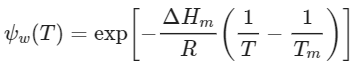

$$ \phi_w(T) = \exp
\left[
    -\frac
        {\Delta H_m}
        {R}
    \left(
        \frac{1}{T}
        -\frac{1}{T_m}
    \right)
\right]$$

## Problem 2 (20 points)
The following coupled ODEs describe a process of interest 
$$ \frac{dy}{dt}+2y+5z=10$$
$$ \frac{dz}{dt}=y$$ 
with initial values $y(0) = 0$, $z(0)=0$
* Numerically solve $y(t)$ and $z(t)$ for $0 \leq t \leq 7$.  
* Make a smooth and well-formatted plot of the solution

Note that this problem is repeated on the Excel part of the exam

In [2]:
# Initial constants
t_a = 0
t_b = 7
N = 1000
Δt = (t_b-t_a)/N
yz0 = [0,0]

# Derivative equations
d_dt = lambda yz, t: [10 - 2 * yz[0] - 5 * yz[1], yz[0]]

In [3]:
# Array spaces
t_vals = np.linspace(t_a, t_b, N)

# Use odeint to calculate
yz_vals = odeint(d_dt, yz0, t_vals)

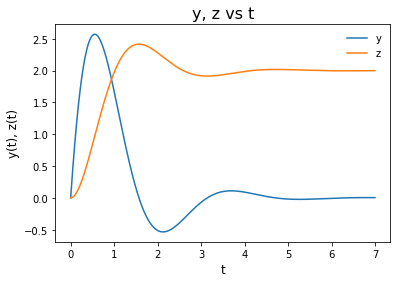

In [4]:
# Plot the results
plt.plot(t_vals, yz_vals[:,0], label='y')
plt.plot(t_vals, yz_vals[:,1], label='z')
plt.xlabel('t', fontsize=12)
plt.ylabel('y(t), z(t)', fontsize=12)
plt.title('y, z vs t', fontsize=16)
plt.legend(frameon=False);

## Problem 3 (30 points)
The following equation describes the change in _enthalpy_ or amount of work done by a gas compressor $$\Delta H = \int_{T_1}^{T_2}C_p(T)~dT$$ where $T$ is temperature and subscripts 1 and 2 indicate inlet and outlet respectively. The constant-pressure heat capacity $C_p$ as a function of temperature is already programmed below for methane (natural gas). The inlet temperature is $T_1=300~\mathrm{K}$. 

In a previous calculation it was determined that if we can assume constant entropy ($\Delta S=0$) for a natural gas compressor then the reversible outlet temperature is $T_{2,\mathrm{rev}}=586~\mathrm{K}$. However, that outlet calculation does not account for friction inside a real compressor--friction means you have to work harder! For a particular real compressor $$\Delta H = 1.33~\Delta H_\mathrm{rev}$$ where $\Delta H$ is computed with the real $T_2$ value and $\Delta H_\mathrm{rev}$ is computed with $T_{2,\mathrm{rev}}$. Using Python, numerically determine both $T_2$ and $\Delta H$ (with units) for this real compressor.

In [5]:
#----------------------------------------------------------------
# Function that gives the heat capacity (J/mol.K) for methane, 
# with T in Kelvin
# source: https://webbook.nist.gov/cgi/cbook.cgi?ID=C74828&Mask=1
def Cp(T):
    TT = T/1000.
    A = [-0.703029, 108.4773, -42.52157, 5.862788, 0.678565]
    return A[0] + A[1]*TT + A[2]*TT**2 + A[3]*TT**3 + A[4]*TT**-2
#----------------------------------------------------------------

# Define constants
T1 = 300                                         # K
T2_rev = 586                                     # K

In [6]:
# Define required functions
def ΔH(T2, T1):                                  # J
    return quad(lambda T: Cp(T), T1, T2)[0]

def equality(T2, T1, T2_rev):
    return ΔH(T2, T1) - 1.33 * ΔH(T2_rev, T1)

In [7]:
# use fsolve to numerically find the solution
T2 = fsolve(equality, 600, args=(T1, T2_rev))[0]        # K

# print out the solution
print(r'The enthalpy of the system is {ΔH:.2f} kJ/mol, and the outlet temperature is {T2:.0f} K'.format(ΔH=ΔH(T2, T1)/1000, T2=round(T2)))

The enthalpy of the system is 16.41 kJ/mol, and the outlet temperature is 662 K


## Problem 4 (40 points)

When you dissolve sugar in water, it lowers the freezing point. The following experimental data were collected (Raventos et al., _J. Food Eng._ 79 (2007) 577–585). 

| $w_s$      | $T$ ($^\circ$C) |
| :--------: | :---------------------: |
|    0.10   |     -0.3    |
|    0.20   |     -1.5    |
|    0.30   |     -3.1    |
|    0.40   |     -5.2    |

where $w_s$ is mass fraction of sugar in the sugar-water mixture and $T$ is the freezing temperature. These temperatures appear to have noise, i.e. a statistically significant amount of random error. 

We expect that the true freezing temperature will obey the following thermodynamic model:

$$ \frac{1}{T} = \frac{1}{T_m}-\frac{R}{\Delta H_m}\left[ \ln(1-x_s)+ A x_s^2 \right]$$ 

* $x_s$ is mole fraction sugar
* $A$ is a dimensionless 'Margules' fitting coefficient relating to the mixture, and which can be positive or negative
* $\Delta H_m=6.02~\mathrm{kJ/mol}$ and $T_m=273.15~\mathrm{K}$ are properties relating to freezing of pure water
* $R$ is the ideal gas constant 
* The value of freezing temperature $T$ in the above formula will be absolute, i.e. in units $\mathrm{K}$, not $^\circ \mathrm{C}$

Note that you will need to do units conversions. You also need to convert between mass fraction $w_s$ and mole fraction $x_s$:


$$x_s = \frac{\frac{w_s}{M_s}}{\frac{w_s}{M_s}+\frac{1-w_s}{M_w}}$$

The molecular masses of sugar and water are respectively $M_s=342~\mathrm{g/mol}$ and $M_w=18~\mathrm{g/mol}$. 

Do the following:

(a) Select an appropriate method to cause the thermodynamic model to best fit the experimental data. What is the value of $A$ for that fit?

(b) Plot the above experimental data ($w_s$ on the _x axis_ and freezing temperature ($^\circ \mathrm{C}$) on the _y axis_). Add to your plot a smooth curve for your fit over the range $0\le w_s \le 0.45$.

(c) A sample of orange juice freezes at $-2.0~^\circ \mathrm{C}$. Estimate its mass fraction of sugar using the thermodynamic model.

In [8]:
# Insert data
# w_s (unitless), T (C)
ws_T_data = np.array([
    [0.10, -0.3],
    [0.20, -1.5],
    [0.30, -3.1],
    [0.40, -5.2]
])

# Set constants
ΔH_m = conv.kJ_J(6.02)         # J/mol
T_m  = 273.15                  # K
R    = 8.314                   # J/K⋅mol

In [9]:
# Define required functions
def x_s(w_s):                  # unitless
    M_s  = 342                 # g/mol
    M_w  = 18                  # g/mol
    return (w_s/M_s)/(w_s/M_s + (1-w_s)/M_w)

def T(w_s, A):                 # C
    sub_A = 1/T_m
    sub_B = R/ΔH_m
    sub_C = np.log(1-x_s(w_s))
    sub_D = A * x_s(w_s)**2
    result_K = 1 / (sub_A - sub_B*(sub_C+sub_D))
    return conv.K_C(result_K)

(a) Select an appropriate method to cause the thermodynamic model to best fit the experimental data. What is the value of  𝐴  for that fit?

In [10]:
# Fit the data to a curve of T() to find A

A_fitted = curve_fit(T, ws_T_data[:,0], ws_T_data[:,1])[0][0]

# get the Pearson's R2 value
T_fit = T(ws_T_data[:,0], A_fitted)
Covar = np.corrcoef(ws_T_data[:,1], T_fit)

print("The \'Margules\' fitting constant (A) for the fit of the given data is {A:.2f} with a least squares regression of {R2:.4f}".format(A=A_fitted, R2=Covar[0][1]**2))

The 'Margules' fitting constant (A) for the fit of the given data is -14.87 with a least squares regression of 0.9960


(b) Plot the above experimental data ( 𝑤𝑠  on the x axis and freezing temperature ( ∘C ) on the y axis). Add to your plot a smooth curve for your fit over the range  0≤𝑤𝑠≤0.45 .

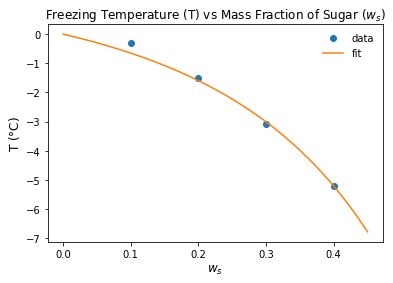

In [11]:
# Get the data points for the fit
ws_vals = np.linspace(0, 0.45, 1000)
T_vals = T(ws_vals, A_fitted)

# Plot the data and the fit
plt.title('Freezing Temperature (T) vs Mass Fraction of Sugar ($w_s$)', fontsize=12)
plt.plot(ws_T_data[:,0], ws_T_data[:,1], 'o')
plt.plot(ws_vals, T_vals, '-')
plt.xlabel('$w_s$', fontsize=12)
plt.ylabel('T ($\degree$C)', fontsize=12)
plt.legend(['data', 'fit'], frameon=False);

(c) A sample of orange juice freezes at  −2.0 ∘C . Estimate its mass fraction of sugar using the thermodynamic model.

In [12]:
T_ojuice = -2.0             # C
w_s_ojuice = fsolve(lambda w_s: T(w_s, A_fitted) - T_ojuice, 0.2)[0]
print("According to the data we have, we would expect a glass of orange juice that freezes at {:.1f} C to be approximately {:.0f}% sugar in mass".format(T_ojuice,w_s_ojuice*100))

According to the data we have, we would expect a glass of orange juice that freezes at -2.0 C to be approximately 23% sugar in mass



# Leave 5 minutes for uploading your work

**Instructions**: You must submit your Python notebook as a **pdf** file and your Excel work as an Excel **xlsm** file. Make sure the Python is properly displaying the results from your code. To this end, do the following 
1. Run $\rightarrow$ Restart Kernel and Run All Cells. If you have _broken code_ (interpreter throws an error) then comment out the offending line(s) and rerun, or manually run all subsequent cells, because broken code will keep code for the following cells from executing automatically. You will lose additional points if I can't see all your solutions.
2. Covert the ipynb file to html (File $\rightarrow$ Export Notebook As $\rightarrow$ HTML)
3. Open the html file in your browser and _print to pdf_. Make sure file name has been changed to your personal name. When you print to pdf, you can shrink the size of the pdf (i.e. less than 100%) to make longer lines of code fit. 
